# Expected Score Model - Data Exploration

In [13]:
import pandas as pd
import numpy as np
from mplfooty.pitch import Pitch

import sys
sys.path.append("..")
from config import raw_data_file_path

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

Import data

In [2]:
chain_data = pd.read_csv(raw_data_file_path, low_memory=False)
chain_data.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year
0,1,centreBounce,goal,1.0,1,13,13.0,Brisbane Lions,NaN,NaN,NaN,Centre Bounce,0.0,0.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
1,1,centreBounce,goal,2.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Hard Ball Get,8.0,-5.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
2,1,centreBounce,goal,3.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Handball,9.0,-6.0,ineffective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
3,1,centreBounce,goal,4.0,1,13,28.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Loose Ball Get,11.0,-7.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
4,1,centreBounce,goal,5.0,1,13,29.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Handball,12.0,-5.0,effective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021


In [61]:
chain_data.head(100)

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Shot_Outcome,Goal,Behind
0,1,centreBounce,goal,1.0,1,13,13.0,Brisbane Lions,NaN,NaN,NaN,Centre Bounce,0.0,0.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
1,1,centreBounce,goal,2.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Hard Ball Get,8.0,-5.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
2,1,centreBounce,goal,3.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Handball,9.0,-6.0,ineffective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
3,1,centreBounce,goal,4.0,1,13,28.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Loose Ball Get,11.0,-7.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
4,1,centreBounce,goal,5.0,1,13,29.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Handball,12.0,-5.0,effective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
5,1,centreBounce,goal,6.0,1,13,30.0,Brisbane Lions,Sydney,George Hewett,George_Hewett,Handball Received,14.0,-2.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
6,1,centreBounce,goal,7.0,1,13,31.0,Brisbane Lions,Sydney,George Hewett,George_Hewett,Kick,22.0,-2.0,clanger,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
7,1,centreBounce,goal,8.0,1,13,36.0,Brisbane Lions,Brisbane Lions,Hugh McCluggage,Hugh_McCluggage,Gather from Opposition,6.0,-27.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
8,1,centreBounce,goal,9.0,1,13,37.0,Brisbane Lions,Brisbane Lions,Hugh McCluggage,Hugh_McCluggage,Handball,11.0,-26.0,effective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0
9,1,centreBounce,goal,10.0,1,13,38.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Handball Received,18.0,-23.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,goal,1,0


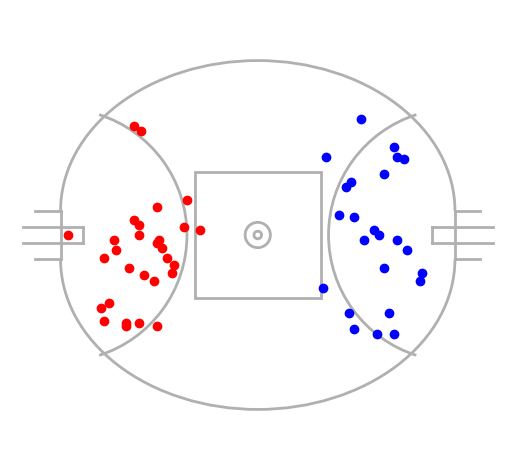

In [63]:
fig, ax = plot_match_events(chain_data, match_id = "202101_BrisbaneLions_Sydney", event = "Shot", home_colour="blue", away_colour="red")
pitch.scatter(x=)

In [5]:
chain_data.shape

(845387, 25)

Descriptions

In [3]:
chain_data['Description'].value_counts()

Kick                           173634
Handball                       120069
Handball Received               96322
Uncontested Mark                70522
Loose Ball Get                  47414
Kick Into F50                   37333
Kick Inside 50 Result           37317
Hard Ball Get                   28183
Spoil                           27554
Loose Ball Get Crumb            24323
Gather                          14594
Out of Bounds                   14556
Contest Target                  13458
Free For                        13431
Contested Mark                  12923
Centre Bounce                   11042
Ball Up Call                    10143
Goal                             9753
Gather From Hitout               8096
Kickin play on                   7192
Behind                           6974
Contested Knock On               6466
Mark On Lead                     6248
Hard Ball Get Crumb              5764
Ground Kick                      5606
Gather from Opposition           4729
Bounce      

Goals

In [6]:
chain_data[chain_data['Description'] == "Goal"]

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year
13,1,centreBounce,goal,14.0,1,13,40.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Goal,26.0,-21.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
61,6,possGain,goal,62.0,1,149,169.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Goal,35.0,19.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
110,10,possGain,goal,111.0,1,285,311.0,Brisbane Lions,Brisbane Lions,Joe Daniher,Joe_Daniher,Goal,50.0,24.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
222,21,possGain,goal,223.0,1,653,670.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Goal,34.0,15.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
476,46,possGain,goal,477.0,1,1383,1390.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Goal,56.0,6.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845238,218,possGain,goal,1838.0,4,1136,1199.0,Geelong,Geelong,Sam De Koning,Sam_De_Koning,Goal,78.0,1.0,NaN,NaN,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022
845249,219,centreBounce,goal,1849.0,4,1252,1272.0,Sydney,Sydney,Chad Warner,Chad_Warner,Goal,26.0,3.0,NaN,NaN,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022
845302,227,throwIn,goal,1902.0,4,1452,1461.0,Geelong,Geelong,Joel Selwood,Joel_Selwood,Goal,37.0,17.0,NaN,NaN,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022
845313,228,centreBounce,goal,1913.0,4,1519,1564.0,Geelong,Geelong,Jeremy Cameron,Jeremy_Cameron,Goal,41.0,21.0,NaN,NaN,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022


Behinds

In [7]:
chain_data[chain_data['Description'] == "Behind"]

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year
183,17,kickIn,behind,184.0,1,520,583.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Behind,46.0,-41.0,NaN,NaN,missLeft,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
295,28,possGain,behind,296.0,1,859,912.0,Sydney,Sydney,Sam Reid,Sam_Reid,Behind,52.0,35.0,NaN,NaN,missLeft,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
354,34,possGain,behind,355.0,1,1015,1082.0,Sydney,Sydney,Josh P. Kennedy,Josh_P._Kennedy,Behind,45.0,16.0,NaN,NaN,missRight,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
446,43,possGain,behind,447.0,1,1272,1321.0,Brisbane Lions,Brisbane Lions,Joe Daniher,Joe_Daniher,Behind,27.0,31.0,NaN,NaN,touched,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
512,50,possGain,behind,513.0,1,1462,1503.0,Brisbane Lions,Brisbane Lions,Oscar McInerney,Oscar_McInerney,Behind,65.0,-15.0,NaN,NaN,missLeft,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844739,175,throwIn,behind,1339.0,3,1441,1453.0,Geelong,Geelong,Cameron Guthrie,Cameron_Guthrie,Behind,72.0,16.0,NaN,NaN,missRight,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022
844759,177,possGain,behind,1359.0,3,1466,1502.0,Geelong,Geelong,Isaac Smith,Isaac_Smith,Behind,33.0,-34.0,NaN,NaN,missLeft,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022
845064,208,possGain,behind,1664.0,4,634,684.0,Geelong,Geelong,Tom Hawkins,Tom_Hawkins,Behind,41.0,25.0,NaN,NaN,leftPost,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022
845089,210,possGain,behind,1689.0,4,715,740.0,Geelong,Geelong,Tyson Stengle,Tyson_Stengle,Behind,55.0,35.0,NaN,NaN,rightPost,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022


Shots

In [8]:
shots = chain_data[chain_data['Shot_At_Goal'] == True]

In [9]:
shots['Final_State'].value_counts(normalize=True)

goal           0.489814
behind         0.347753
turnover       0.092685
rushed         0.036452
outOfBounds    0.026834
endQuarter     0.003404
ballUpCall     0.002960
rushedOpp      0.000099
Name: Final_State, dtype: float64

In [12]:
final_state_map = {
    'goal':'goal',
    'behind':'behind',
    'turnover':'miss',
    'rushed':'miss',
    'outOfBounds':'miss',
    'ballUpCall':'miss',
    'endQuarter':'miss',
    'rushedOpp':'miss',
}
chain_data['Shot_Outcome'] = chain_data['Final_State'].map(final_state_map)
chain_data['Goal'] = np.where(chain_data['Shot_Outcome'] == "goal", 1, 0)
chain_data['Behind'] = np.where(chain_data['Shot_Outcome'] == "behind", 1, 0)

Plotting Match Shots

In [56]:
def plot_match_events(chain_data, match_id, event, home_colour="blue", away_colour = "red"):
    
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
 
    # Get teams
    home_team = list(set(match['Home_Team']))[0]
    away_team = list(set(match['Away_Team']))[0]
    
    # Get pitch dimensions
    match_pitch_length = list(set(match['Venue_Length']))[0]
    match_pitch_width = list(set(match['Venue_Width']))[0]
    # Plot pitch
    pitch = Pitch(pitch_width=match_pitch_width, pitch_length=match_pitch_length)
    fig, ax = pitch.draw()
       
    # Filter event
    if event == "Shot":
        match_events = match[match['Shot_At_Goal'] == True]
    else:
        match_events = match[match['Description'] == event]
    
    # Plot home shots
    x_home = match_events[match_events['Team'] == home_team]['x']
    y_home = match_events[match_events['Team'] == home_team]['y']
    pitch.scatter(x_home, y_home, ax=ax, color = home_colour)
    # Plot away shots
    x_away = -1*match_events[match_events['Team'] == away_team]['x']
    y_away = -1*match_events[match_events['Team'] == away_team]['y']
    pitch.scatter(x_away, y_away, ax=ax, color = away_colour)
    
    return fig, ax

In [57]:
match['Description'].unique()

array(['Centre Bounce', 'Hard Ball Get', 'Handball', 'Loose Ball Get',
       'Handball Received', 'Kick', 'Gather from Opposition',
       'Kick Into F50', 'Kick Inside 50 Result', 'Goal',
       'Ruck Hard Ball Get', 'Out of Bounds', 'Gather From Hitout',
       'Spoil', 'Hard Ball Get Crumb', 'Bounce', 'Knock On', 'Gather',
       'Ball Up Call', 'Contest Target', 'Uncontested Mark',
       'Mark On Lead', 'Kickin play on', 'Loose Ball Get Crumb', 'Behind',
       'Contested Mark', 'Free For', 'Mark Fumbled', 'Mark Dropped',
       'Ground Kick', 'Free For: Off The Ball', 'No Pressure Error',
       'Shot At Goal', 'Out On Full After Kick', 'OOF Kick In',
       'Kickin short', 'Contested Knock On', 'Free For: In Possession',
       'Tackle', 'Free Advantage', 'Kickin long', 'Credit'], dtype=object)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

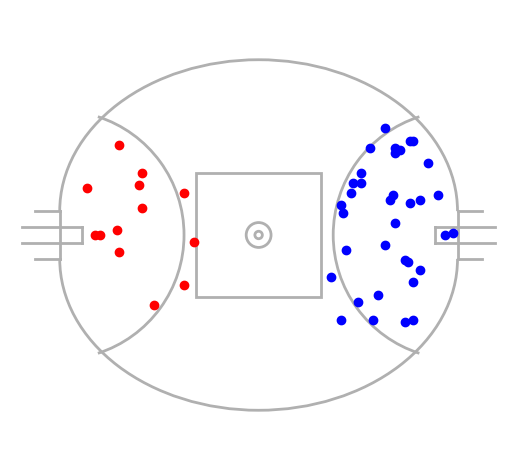

In [58]:
plot_match_events(chain_data, match_id = "2022F4_Geelong_Sydney", event = "Shot", home_colour="blue", away_colour="red")

(<Figure size 640x480 with 1 Axes>, <Axes: >)

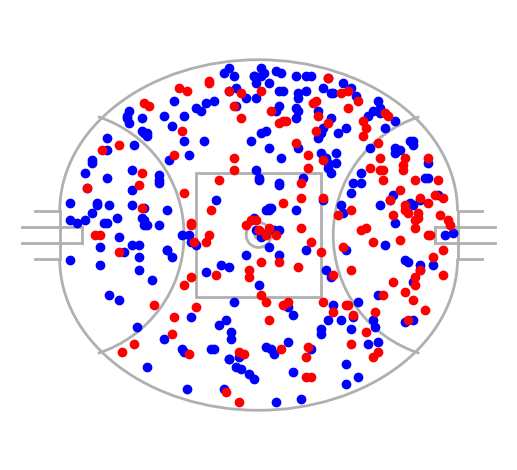

In [59]:
plot_match_events(chain_data, match_id = "2022F4_Geelong_Sydney", event = "Kick", home_colour="blue", away_colour="red")

(<Figure size 640x480 with 1 Axes>, <Axes: >)

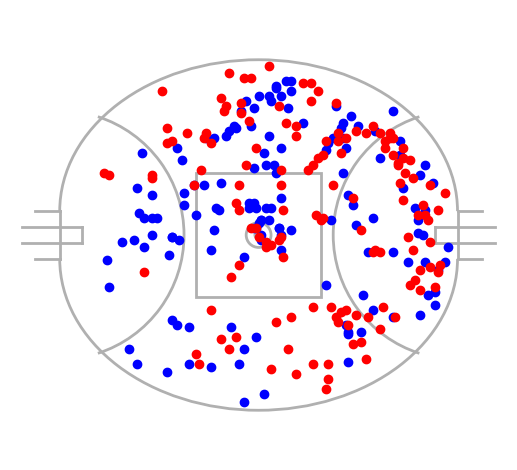

In [60]:
plot_match_events(chain_data, match_id = "2022F4_Geelong_Sydney", event = "Handball", home_colour="blue", away_colour="red")